In [1]:
from pathlib import Path

import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

from utilFuncs import show_image, show_best_worst, get_best_worst, iterate_gen

In [2]:
IMG_SIZE = (64, 64)
FILTER_SIZE = (3, 3)
FILTER_ALPHA = 0.2
FILTER = np.ones(shape = FILTER_SIZE, dtype = np.float64) * FILTER_ALPHA
FILTER_MAX_POS = (IMG_SIZE[0] + FILTER_SIZE[0] - 1, IMG_SIZE[1] + FILTER_SIZE[1] - 1)
OUTPUT_SIZE = (FILTER_MAX_POS[0] + FILTER_SIZE[0] - 1, FILTER_MAX_POS[1] + FILTER_SIZE[1] - 1)
POPULATION_SIZE = 100
ELITISM = 20
MUTATE_PROB = 0.1
GENERATIONS = 200
FILTER_MAX_POS, OUTPUT_SIZE

((66, 66), (68, 68))

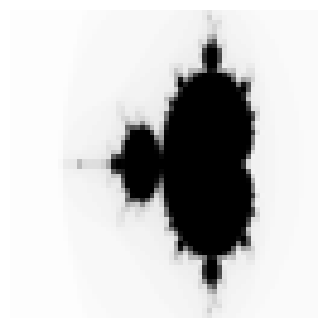

In [3]:
img_arr = np.array(Image.open("mandelbrot.png").convert('L').resize(IMG_SIZE)) / 255
show_image(img_arr)

In [4]:
FILTER_COUNT = int((img_arr.sum() / FILTER.sum()) * 1.1)
FILTER_COUNT

1950

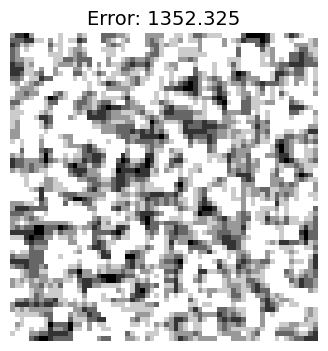

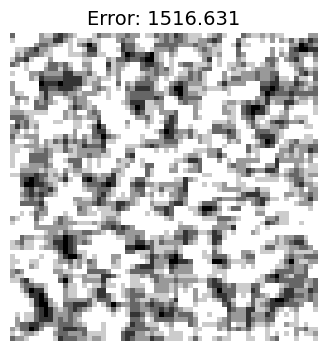

In [5]:
pop_filter_pos = [
    np.vstack((
        np.random.randint(FILTER_MAX_POS[0], size = FILTER_COUNT),
        np.random.randint(FILTER_MAX_POS[1], size = FILTER_COUNT),
    )).T
    for _ in range(POPULATION_SIZE)
]

best_images = []
best_errors = []

(best_out, best_err), (worst_out, worst_err) = get_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)
best_images.append(best_out)
best_errors.append(best_err)

show_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)

  0%|          | 0/200 [00:00<?, ?it/s]

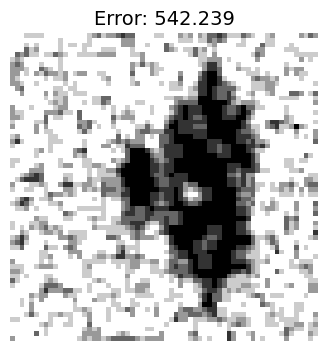

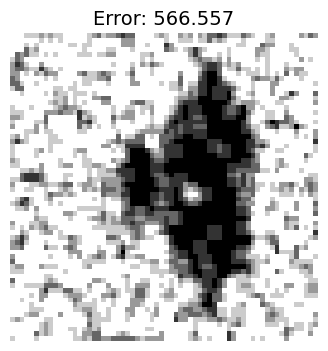

In [6]:
for gen in tqdm(range(GENERATIONS)):
    pop_filter_pos = iterate_gen(
        pop_filter_pos,
        img_arr,
        FILTER,
        OUTPUT_SIZE,
        ELITISM,
        MUTATE_PROB,
        FILTER_MAX_POS
    )

    (best_out, best_err), (worst_out, worst_err) = get_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)
    best_images.append(best_out)
    best_errors.append(best_err)

show_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)

In [7]:
imgs = [
    Image.fromarray(best_img * 255)
    for best_img in best_images
]

imgs[0].save(
    fp = Path("simulation.gif"), 
    format = 'GIF', 
    append_images = imgs[1:],
    save_all = True,
    duration = 40,
    loop = True
)